In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


### Load data

In [5]:
import pandas as pd

df = pd.read_csv('BostonHousing.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   N

### 3- Exploratory Data Analysis (EDA)

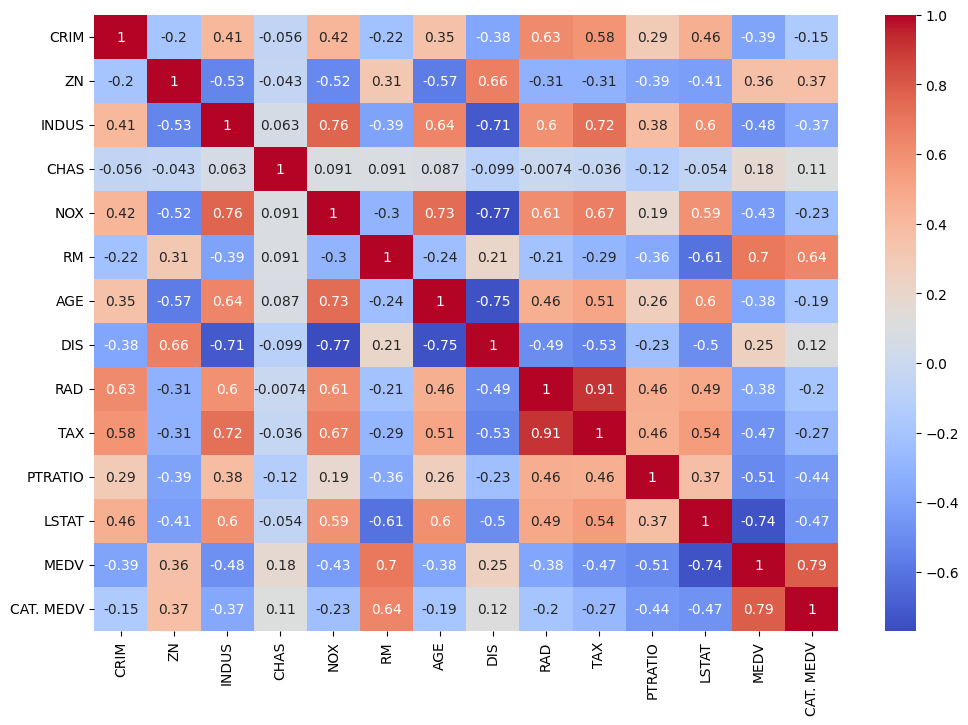

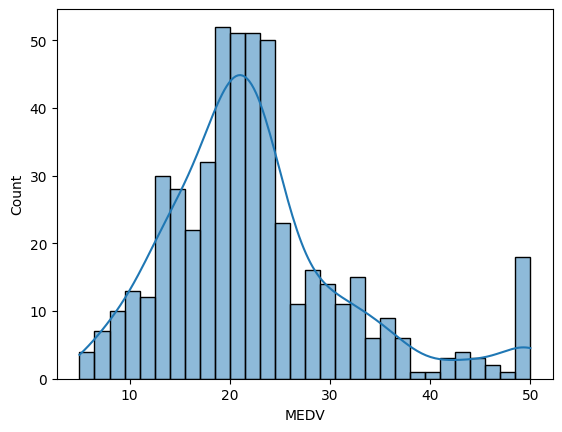

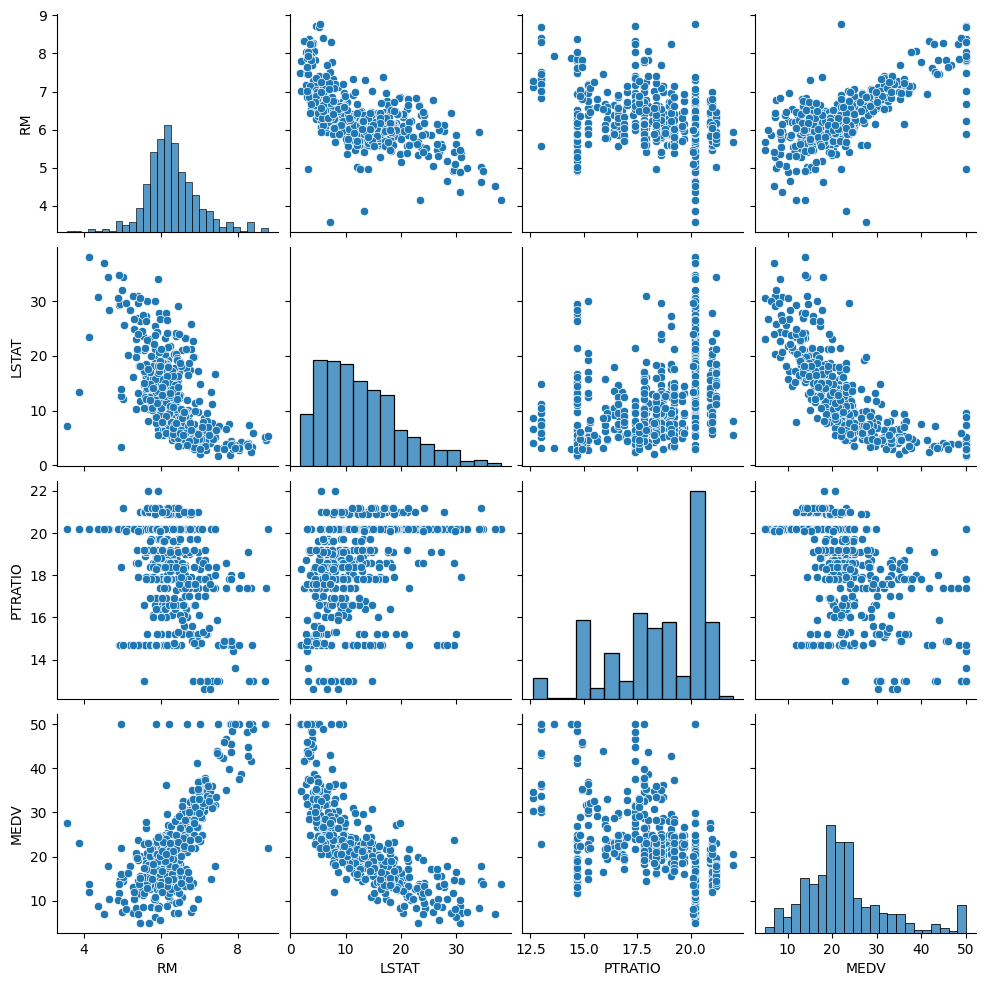

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of target
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.show()

# Pairplot for key features
sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']])
plt.show()


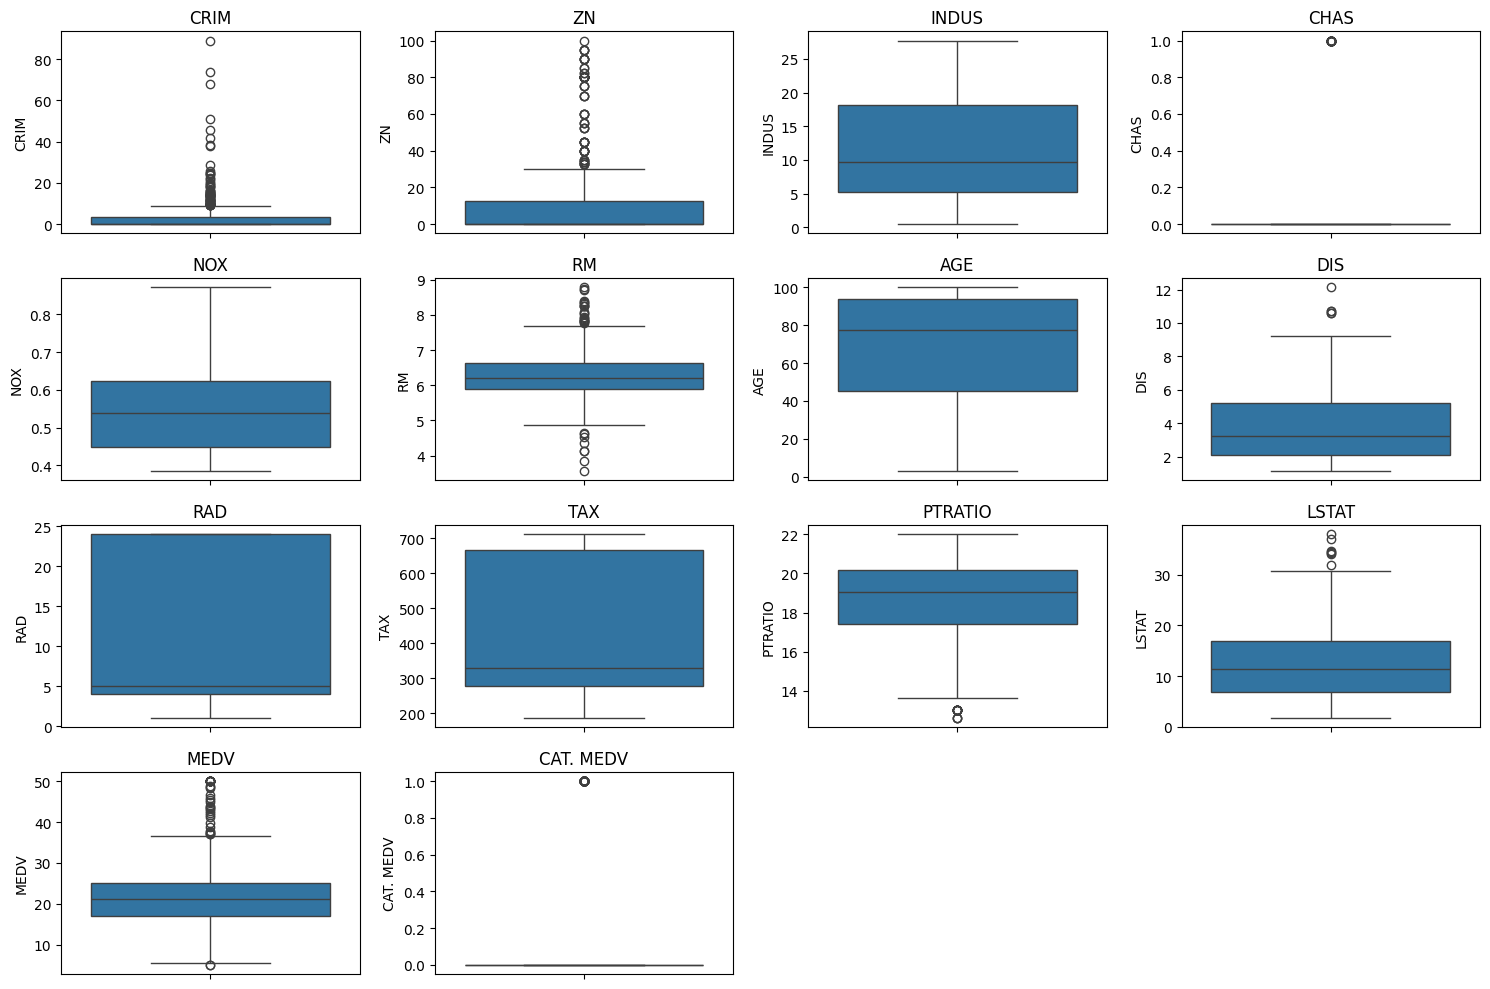

In [8]:
#check outliers 
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for all numeric features
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()



In [ ]:
#IQR Method to dect OUtliers 
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")



CRIM: 66 outliers
ZN: 68 outliers
INDUS: 0 outliers
CHAS: 35 outliers
NOX: 0 outliers
RM: 30 outliers
AGE: 0 outliers
DIS: 5 outliers
RAD: 0 outliers
TAX: 0 outliers
PTRATIO: 15 outliers
LSTAT: 7 outliers
MEDV: 40 outliers
CAT. MEDV: 84 outliers
2      1
3      1
4      1
39     1
40     1
      ..
368    1
369    1
370    1
371    1
372    1
Name: CAT. MEDV, Length: 84, dtype: int64


In [12]:
# to see the actual outlier values, uncomment the following line
print(df[col][(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)])

2      1
3      1
4      1
39     1
40     1
      ..
368    1
369    1
370    1
371    1
372    1
Name: CAT. MEDV, Length: 84, dtype: int64


In [14]:

# Load dataset
df = pd.read_csv('BostonHousing.csv')

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# Detect outliers using IQR method
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    outlier_counts[col] = len(outliers)

# Show outlier counts for each column
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


CRIM: 66 outliers
ZN: 68 outliers
INDUS: 0 outliers
CHAS: 35 outliers
NOX: 0 outliers
RM: 30 outliers
AGE: 0 outliers
DIS: 5 outliers
RAD: 0 outliers
TAX: 0 outliers
PTRATIO: 15 outliers
LSTAT: 7 outliers
MEDV: 40 outliers
CAT. MEDV: 84 outliers


In [17]:
# Make a copy to preserve original dataframe
df_capped = df.copy()

for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Cap values at the lower and upper bounds
    df_capped[col] = df_capped[col].clip(lower, upper)

# Check outliers again after capping
outlier_counts_after = {}
for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_capped[(df_capped[col] < Q1 - 1.5*IQR) | (df_capped[col] > Q3 + 1.5*IQR)]
    outlier_counts_after[col] = len(outliers)

print("\nOutlier counts after capping:")
for col, count in outlier_counts_after.items():
    print(f"{col}: {count} outliers")




Outlier counts after capping:
CRIM: 0 outliers
ZN: 0 outliers
INDUS: 0 outliers
CHAS: 0 outliers
NOX: 0 outliers
RM: 0 outliers
AGE: 0 outliers
DIS: 0 outliers
RAD: 0 outliers
TAX: 0 outliers
PTRATIO: 0 outliers
LSTAT: 0 outliers
MEDV: 0 outliers
CAT. MEDV: 0 outliers


In [19]:
# Save the cleaned dataset
df_capped.to_csv('data/BostonHousing_clean.csv', index=False)

print("Cleaned dataset saved successfully as 'BostonHousing_clean.csv'")


Cleaned dataset saved successfully as 'BostonHousing_clean.csv'


### check datadistribution 

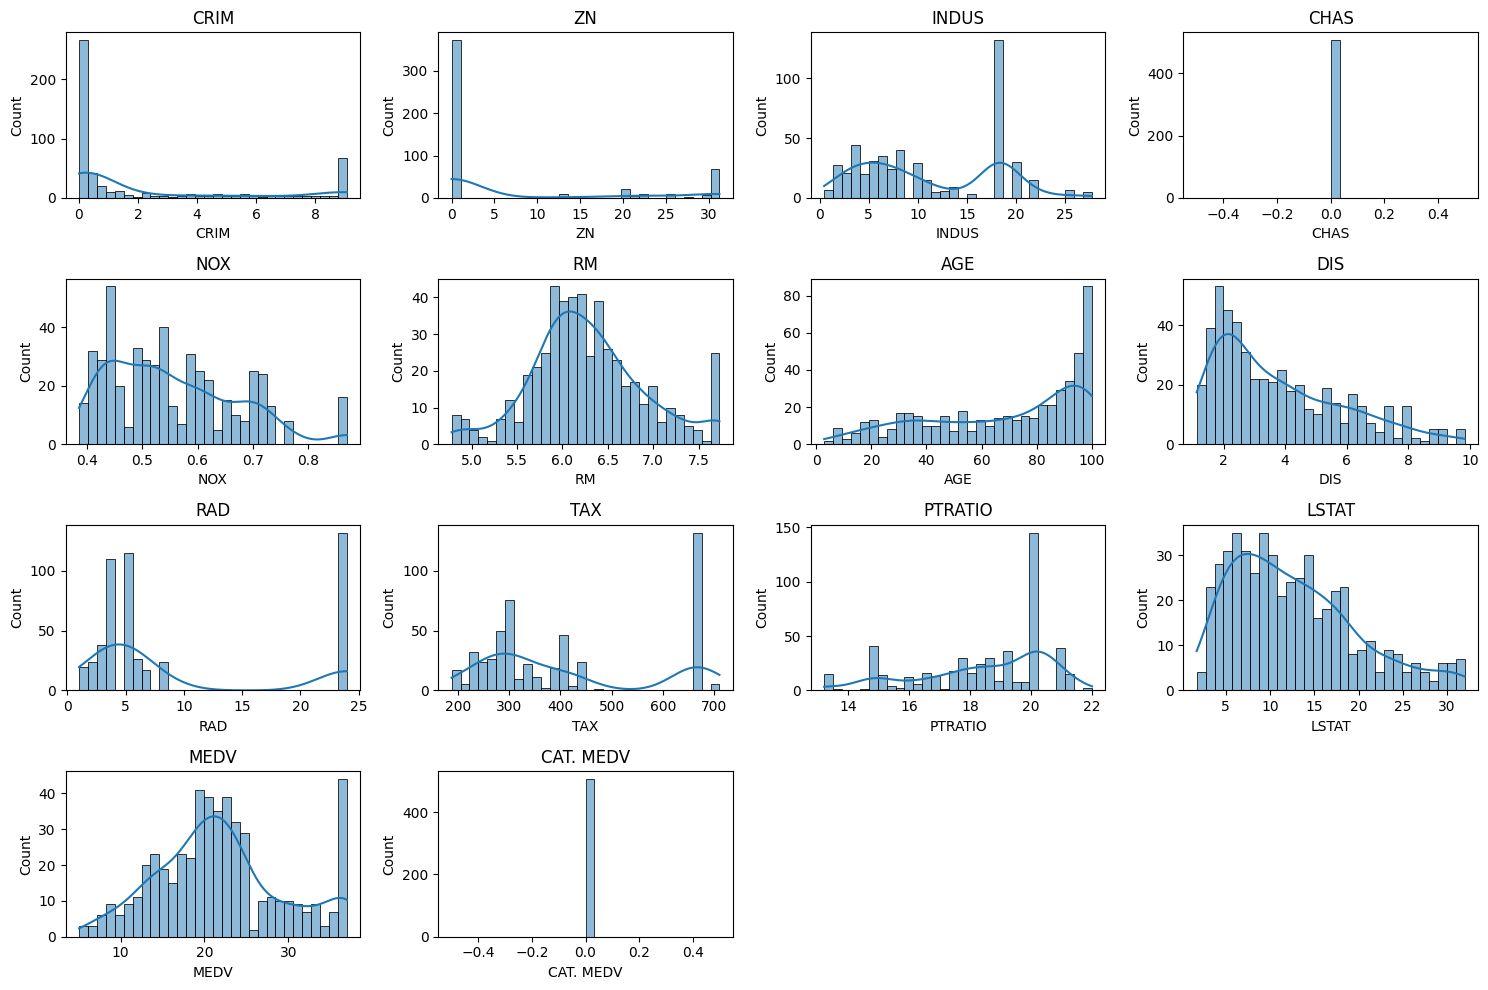

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df_capped[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


Data distribution 

In [28]:
# Load capped dataset (already done)
df_clean = df_capped.copy()

numeric_cols = df_clean.select_dtypes(include=['float64','int64']).columns

# 1️⃣ Basic statistics
print("=== Basic Statistics ===")
print(df_clean[numeric_cols].describe())

=== Basic Statistics ===
             CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.0  506.000000  506.000000   
mean     2.225032    6.963439   11.136779    0.0    0.554695    6.275312   
std      3.313353   12.028788    6.860353    0.0    0.115878    0.630242   
min      0.006320    0.000000    0.460000    0.0    0.385000    4.778500   
25%      0.082045    0.000000    5.190000    0.0    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.0    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.0    0.624000    6.623500   
max      9.069639   31.250000   27.740000    0.0    0.871000    7.730500   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.783947    9.549407  408.237154   18.463834   12.612011   
std     28.148861    2.069765    8.707259  168.

In [23]:
# 2️⃣ Skewness and Kurtosis
print("\n=== Skewness and Kurtosis ===")
skew_kurt = pd.DataFrame({
    'Skewness': df_clean[numeric_cols].skew(),
    'Kurtosis': df_clean[numeric_cols].kurt()
})
print(skew_kurt)



=== Skewness and Kurtosis ===
           Skewness  Kurtosis
CRIM       1.282313 -0.050115
ZN         1.261340 -0.225167
INDUS      0.295022 -1.233540
CHAS       0.000000  0.000000
NOX        0.729308 -0.064667
RM         0.296640  0.232644
AGE       -0.598963 -0.967716
DIS        0.908467 -0.012723
RAD        1.004815 -0.867232
TAX        0.669956 -1.142408
PTRATIO   -0.762495 -0.421864
LSTAT      0.808671  0.088028
MEDV       0.353614 -0.334436
CAT. MEDV  0.000000  0.000000


In [24]:
# 3️⃣ Correlation with target (MEDV)
print("\n=== Correlation with MEDV ===")
cor_target = df_clean.corr()['MEDV'].sort_values(ascending=False)
print(cor_target)


=== Correlation with MEDV ===
MEDV         1.000000
RM           0.697645
ZN           0.428126
DIS          0.333079
RAD         -0.452679
AGE         -0.458662
NOX         -0.506505
PTRATIO     -0.523993
CRIM        -0.538589
TAX         -0.543545
INDUS       -0.561174
LSTAT       -0.797200
CHAS              NaN
CAT. MEDV         NaN
Name: MEDV, dtype: float64


In [25]:
# 4️⃣ Outlier counts after capping (for confirmation)
print("\n=== Outlier Counts (after capping) ===")
outlier_counts_after = {}
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_clean[(df_clean[col] < Q1 - 1.5*IQR) | (df_clean[col] > Q3 + 1.5*IQR)]
    outlier_counts_after[col] = len(outliers)
print(outlier_counts_after)


=== Outlier Counts (after capping) ===
{'CRIM': 0, 'ZN': 0, 'INDUS': 0, 'CHAS': 0, 'NOX': 0, 'RM': 0, 'AGE': 0, 'DIS': 0, 'RAD': 0, 'TAX': 0, 'PTRATIO': 0, 'LSTAT': 0, 'MEDV': 0, 'CAT. MEDV': 0}


In [26]:
# 5️⃣ Unique values for categorical columns (CHAS)
categorical_cols = df_clean.select_dtypes(include=['int64']).columns
print("\n=== Unique values for categorical columns ===")
for col in categorical_cols:
    print(f"{col}: {df_clean[col].unique()}")



=== Unique values for categorical columns ===
CHAS: [0]
RAD: [ 1  2  3  5  4  8  6  7 24]
TAX: [296 242 222 311 307 279 252 233 243 469 226 313 256 284 216 337 345 305
 398 281 247 270 276 384 432 188 437 403 193 265 255 329 402 348 224 277
 300 330 315 244 264 223 254 198 285 241 293 245 289 358 304 287 430 422
 370 352 351 280 335 411 187 334 666 711 391 273]
CAT. MEDV: [0]


In [27]:
# 6️⃣ Optional: Top 5 rows for sanity check
print("\n=== Top 5 Rows ===")
print(df_clean.head())


=== Top 5 Rows ===
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          0  
3   2.94  33.4          0  
4   5.33  36.2          0  


### Skew and Variation Findings

From the numerical EDA on the BostonHousing dataset:

***Variability:***

Features like CRIM, TAX, and LSTAT show high standard deviation and wide ranges, indicating substantial variability among neighborhoods.

Features like RM and ZN have smaller variability, suggesting more consistent values across observations.

***Skewness:***

Positive skew (right-skew) is observed in CRIM, TAX, and LSTAT, as their means are higher than their medians and skewness values >0.8. This indicates a long tail of high values.

Nearly symmetric distributions are seen in RM and MEDV (target), suggesting a more balanced spread of values.

***Implications for Modeling:**

Skewed variables can distort linear relationships in regression models and affect model performance.

High-variability features may dominate models if not scaled, making feature scaling and log-transformation important steps before modeling.

To address skewness and high variability, log-transformations and feature scaling will be applied to improve model performance and ensure balanced contributions of all predictors


### check again the clean data 

In [38]:
# ======================================================
# 0️⃣ Import Libraries
# ======================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ======================================================
# 1️⃣ Load Cleaned Dataset
# ======================================================
df = pd.read_csv('data/BostonHousing_clean.csv')
print("Dataset loaded. Shape:", df.shape)


Dataset loaded. Shape: (506, 14)


In [39]:
# ======================================================
# 2️⃣ Log-Transform Skewed Features
# ======================================================
skewed_features = ['CRIM', 'TAX', 'LSTAT']
for col in skewed_features:
    df[col+'_log'] = np.log1p(df[col])
print("Log-transformation applied to skewed features:", skewed_features)

Log-transformation applied to skewed features: ['CRIM', 'TAX', 'LSTAT']


In [40]:
# ======================================================
# 3️⃣ Remove Original Skewed Columns
# ======================================================
df = df.drop(columns=skewed_features)
print("Original skewed columns removed. Updated dataset shape:", df.shape)


Original skewed columns removed. Updated dataset shape: (506, 14)


In [41]:
# ======================================================
# 4️⃣ Check Skewness After Log-Transform
# ======================================================
log_features = [col+'_log' for col in skewed_features]
skew_after = df[log_features].skew()
print("\nSkewness of log-transformed features:")
print(skew_after)



Skewness of log-transformed features:
CRIM_log     0.911765
TAX_log      0.331753
LSTAT_log   -0.209744
dtype: float64


In [42]:
# ======================================================
# 5️⃣ Feature Selection Based on Correlation with MEDV
# ======================================================
cor_target = df.corr()['MEDV'].sort_values(ascending=False)
# Select top 8 features (excluding MEDV itself)
top_features = cor_target[1:9].index.tolist()
print("\nTop correlated features with MEDV:", top_features)



Top correlated features with MEDV: ['RM', 'ZN', 'DIS', 'RAD', 'AGE', 'NOX', 'PTRATIO', 'CRIM_log']


In [43]:
# Define features (X) and target (y)
X = df[top_features]
y = df['MEDV']

In [44]:
# ======================================================
# 6️⃣ Train/Test Split
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTrain/Test split done.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train/Test split done.
Train shape: (404, 8) Test shape: (102, 8)


In [45]:
# ======================================================
# 7️⃣ Feature Scaling
# ======================================================
scaler = StandardScaler()  # You can also use MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeature scaling completed. Data is ready for ML models.")



Feature scaling completed. Data is ready for ML models.


In [46]:
# ======================================================
# 8️⃣ Optional: Quick Check of Prepared Data
# ======================================================
print("\nTop 5 rows of features (scaled):")
print(pd.DataFrame(X_train_scaled, columns=top_features).head())

print("\nTarget (first 5 rows):")
print(y_train.head())


Top 5 rows of features (scaled):
         RM        ZN       DIS       RAD       AGE       NOX   PTRATIO  \
0 -1.572008 -0.592657 -0.809679  1.706891  1.028015  0.489252  0.849968   
1 -0.736839 -0.592657  0.333949 -0.624360 -0.431199 -0.157233  1.213244   
2 -0.426408  1.969335  1.355580 -0.974048 -1.618599 -1.008723 -0.648547   
3 -0.312951 -0.592657 -0.847309  1.706891  0.591681  0.489252  0.849968   
4 -0.905448 -0.592657 -0.000903 -0.624360  0.033747 -0.157233  1.213244   

   CRIM_log  
0  1.835697  
1 -0.291480  
2 -0.820085  
3  1.574489  
4 -0.222953  

Target (first 5 rows):
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: MEDV, dtype: float64


In [48]:
feature_desc = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to five Boston employment centers',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s',
    'CAT. MEDV': 'Optional binary target column (0 = low, 1 = high)'
}

feature_df = pd.DataFrame(list(feature_desc.items()), columns=['Feature', 'Description'])
print(feature_df)


      Feature                                        Description
0        CRIM                      Per capita crime rate by town
1          ZN  Proportion of residential land zoned for lots ...
2       INDUS   Proportion of non-retail business acres per town
3        CHAS  Charles River dummy variable (1 if tract bound...
4         NOX  Nitric oxides concentration (parts per 10 mill...
5          RM               Average number of rooms per dwelling
6         AGE  Proportion of owner-occupied units built prior...
7         DIS  Weighted distances to five Boston employment c...
8         RAD          Index of accessibility to radial highways
9         TAX           Full-value property-tax rate per $10,000
10    PTRATIO                        Pupil-teacher ratio by town
11      LSTAT                   % lower status of the population
12       MEDV     Median value of owner-occupied homes in $1000s
13  CAT. MEDV  Optional binary target column (0 = low, 1 = high)


In [67]:
# =========================
# 0️⃣ Import Libraries
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# 1️⃣ Load ML-ready dataset
# =========================
df = pd.read_csv('data/BostonHousing_ML_ready.csv')
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# =========================
# 2️⃣ Select Features and Target
# =========================
# Exclude target from features
X = df.drop(columns=['MEDV'])
y = df['MEDV']

print("\nSelected features:", X.columns.tolist())
print("Target variable: MEDV")

# =========================
# 3️⃣ Train/Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# =========================
# 4️⃣ Scaling (StandardScaler)
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaling completed.")

# =========================
# 5️⃣ Modeling
# =========================
# 5a: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 5b: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # RF not very sensitive to scaling
y_pred_rf = rf_model.predict(X_test)

# 5c: K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# =========================
# 6️⃣ Evaluation Function
# =========================
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE : {mae:.3f}")
    print(f"R²  : {r2:.3f}")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


Dataset shape: (506, 14)
Columns: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV', 'CAT. MEDV', 'CRIM_log', 'TAX_log', 'LSTAT_log']

Selected features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'CAT. MEDV', 'CRIM_log', 'TAX_log', 'LSTAT_log']
Target variable: MEDV

Train set shape: (404, 13)
Test set shape: (102, 13)

Data scaling completed.

Linear Regression Performance:
RMSE: 3.210
MAE : 2.220
R²  : 0.789

Random Forest Performance:
RMSE: 2.423
MAE : 1.824
R²  : 0.880

K-Nearest Neighbors Performance:
RMSE: 2.929
MAE : 1.970
R²  : 0.825


In [68]:
from sklearn.svm import SVR

# =========================
# 5d: Support Vector Regression
# =========================
svr_model = SVR(kernel='rbf')  # RBF kernel is common for regression
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate SVR
evaluate_model(y_test, y_pred_svr, "Support Vector Regression")



Support Vector Regression Performance:
RMSE: 3.230
MAE : 2.087
R²  : 0.787


In [69]:
# =========================
# 0️⃣ Import Libraries
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# 1️⃣ Load ML-ready dataset
# =========================
df = pd.read_csv('data/BostonHousing_ML_ready.csv')
print("Dataset shape:", df.shape)

# =========================
# 2️⃣ Select Features and Target
# =========================
X = df.drop(columns=['MEDV'])
y = df['MEDV']

print("Selected features:", X.columns.tolist())
print("Target variable: MEDV")

# =========================
# 3️⃣ Train/Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# =========================
# 4️⃣ Optional Scaling (not required for Random Forest)
# =========================
# Random Forest is not sensitive to feature scaling

# =========================
# 5️⃣ Hyperparameter Tuning (GridSearchCV)
# =========================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid,
    cv=5, n_jobs=-1, scoring='r2', verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("\nBest Random Forest parameters:", grid_search.best_params_)

# =========================
# 6️⃣ Train Final Random Forest Model
# =========================
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

# =========================
# 7️⃣ Evaluate Model
# =========================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Performance on Test Set:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R²  : {r2:.3f}")

# =========================
# 8️⃣ Feature Importance
# =========================
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Dataset shape: (506, 14)
Selected features: ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'CAT. MEDV', 'CRIM_log', 'TAX_log', 'LSTAT_log']
Target variable: MEDV
Train shape: (404, 13)
Test shape: (102, 13)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Random Forest parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Performance on Test Set:
RMSE: 2.416
MAE : 1.776
R²  : 0.881

Feature Importances:
      Feature  Importance
12  LSTAT_log    0.287177
4          RM    0.235488
8     PTRATIO    0.082002
1       INDUS    0.080840
10   CRIM_log    0.075779
3         NOX    0.072074
6         DIS    0.053082
11    TAX_log    0.052371
5         AGE    0.034814
7         RAD    0.018743
0          ZN    0.007629
2        CHAS    0.000000
9   CAT. MEDV    0.000000


In [70]:
import pickle
import os

# =========================
# 9️⃣ Create model folder if not exists
# =========================
model_folder = 'model'
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# =========================
# 🔹 Save Random Forest model
# =========================
model_path = os.path.join(model_folder, 'RandomForest_BostonHousing.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(best_rf, f)

print(f"Random Forest model saved successfully at: {model_path}")


Random Forest model saved successfully at: model\RandomForest_BostonHousing.pkl


In [71]:
import pickle
import os

# Create model folder if it doesn't exist
model_folder = 'model'
os.makedirs(model_folder, exist_ok=True)

# Save the Random Forest model
model_path = os.path.join(model_folder, 'RandomForest_BostonHousing.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(best_rf, f)

print(f"Random Forest model saved at: {model_path}")

# --- Later, to load the model ---
with open(model_path, 'rb') as f:
    loaded_rf = pickle.load(f)

# Predict on test set
y_pred = loaded_rf.predict(X_test)


Random Forest model saved at: model\RandomForest_BostonHousing.pkl


In [72]:
from joblib import dump, load
import os

# Create model folder if it doesn't exist
model_folder = 'model'
os.makedirs(model_folder, exist_ok=True)

# Save the Random Forest model in joblib format
model_path = os.path.join(model_folder, 'RandomForest_BostonHousing.joblib')
dump(best_rf, model_path)

print(f"Random Forest model saved at: {model_path}")

# --- Later, to load the model ---
loaded_rf = load(model_path)

# Predict on test set
y_pred = loaded_rf.predict(X_test)


Random Forest model saved at: model\RandomForest_BostonHousing.joblib
